<a href="https://colab.research.google.com/github/aboubakar-mtp/hello-git/blob/master/digit_classification_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##### Training a simple CNN on the MNIST dataset #####
### Adapted from Keras Tutorials by Francois Chollet ###

# All the modules and libraries that would be needed to successfully run this notebook

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# READ THE DATA: The load_data() method is pre-defined in Keras and is used in loading the datasets native to Keras.
# Reference: https://www.tensorflow.org/code/stable/tensorflow/python/keras/datasets/mnist.py
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
# Statistics about the training and testing dataset that was read in the last step
print("Number of images in training = " + str(x_train.shape[0]))
print("x_train Examples Loaded = " + str(x_train.shape))
print("y_train Examples Loaded = " + str(y_train.shape))

print("Number of images in test = " + str(x_test.shape[0]))
print("x_test Examples Loaded = " + str(x_test.shape))
print("y_test Examples Loaded = " + str(y_test.shape))

Number of images in training = 60000
x_train Examples Loaded = (60000, 28, 28)
y_train Examples Loaded = (60000,)
Number of images in test = 10000
x_test Examples Loaded = (10000, 28, 28)
y_test Examples Loaded = (10000,)


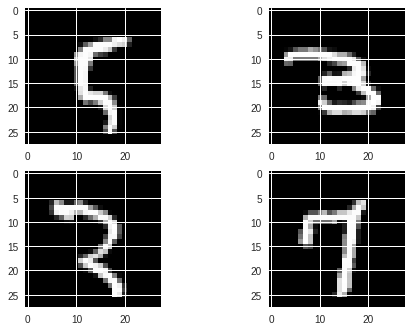

In [13]:
# Visualizing some of the images in the dataset
plt.subplot(221)
plt.imshow(x_train[100], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[250], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[500], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[750], cmap=plt.get_cmap('gray'))

plt.show()

Reshape the images to use them to train a CNN

Two-dimensional convolutional layers require pixel values with the dimensions as [pixels][width][height]

> For RGB images, the first dimension pixels would be 3 for the R,G and B components => 3 image inputs for every color image.

> For MNIST's grayscale images, the pixel dimension is set to 1.









In [14]:
# image_data_format: setting in keras.json that specifies which data format convention Keras will follow.
# Can take on value "channels_last" or "channels_first"
# For 2D data (e.g. image), "channels_last" assumes (rows, cols, channels) while "channels_first" assumes  (channels, rows, cols).
# For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while  "channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
# K.set_image_dim_ordering('th')  -- previously until Python 3.5
from keras import backend as K
if K.image_data_format() == 'channels_last':
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
else:
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
  x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')


# Normalize the data inputs (from 0-255 to 0-1)
''' YOUR CODE GOES HERE '''
x_train = x_train/255
x_test = x_test/255

# Convert class vectors to binary class matrices
''' YOUR CODE GOES HERE '''

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print("Number of classes = " + str(num_classes))

print(y_train)
print(y_test.shape)


Number of classes = 10
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(10000, 10)


Building the model...

In [17]:
# Build the ConvNet model

''' YOUR CODE GOES HERE '''

BATCH_SIZE = 200
EPOCHS  = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28, 28,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

print("\n\n")

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BACTCH_SIZE, verbose=2)

scores = model.evaluate(x_test, y_test, verbose=0)

print('Test Loss', scores[0])

print ('Test Accuracy:', scores[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

NameError: ignored